# Session 2 Exercise Notebook: Data Merging, Transformation, and Exploratory Data Analysis (EDA)
In this notebook, you will apply data merging, transformation, and EDA techniques on the Titanic dataset. Complete each task step by step. Hints are provided where necessary.


## Task 1: Grouping and Aggregation
- Group the Titanic dataset by 'Pclass' and 'Sex'.
- Calculate the average fare and survival rate for each group.
- Display the result in a new DataFrame.

### Hint:
You can use `.groupby()` to group the data and `.agg()` to apply multiple aggregation functions.


In [1]:
# Group by 'Pclass' and 'Sex' and calculate the average fare and survival rate
# (Code here)
import pandas as pd
import numpy as np
titanic = pd.read_csv(r"C:\Users\Lachu\Downloads\Titanic-Dataset - Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
group_by = titanic.groupby(['Pclass','Sex'])

count_for_groupby = group_by.size()
print(count_for_groupby)

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


In [21]:
mean_Fair_for_groupby = group_by['Fare'].mean()
print(mean_Fair_for_groupby)

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64


In [30]:
group_by['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [27]:
result = group_by.agg(survival_rate=('Survived', 'mean'),   # Average survival rate
                            average_age=('Age', 'mean'),          # Average age
                            count=('PassengerId', 'count')        # Count of passengers
)

print(result)
# result = titanic.groupby(['Pclass', 'Sex']).agg(
#     survival_rate=('Survived', 'mean'),   # Average survival rate
#     average_age=('Age', 'mean'),          # Average age
#     count=('PassengerId', 'count')        # Count of passengers
# )

# print(result)

               survival_rate  average_age  count
Pclass Sex                                      
1      female       0.968085    34.611765     94
       male         0.368852    41.281386    122
2      female       0.921053    28.722973     76
       male         0.157407    30.740707    108
3      female       0.500000    21.750000    144
       male         0.135447    26.507589    347


## Task 2: Creating a Pivot Table
- Create a pivot table showing the survival rates by passenger class ('Pclass') and embarkation port ('Embarked').
- Use 'Survived' as the values, 'Pclass' as the index, and 'Embarked' as the columns.
- Calculate the mean of the 'Survived' column.

### Hint:
Use Pandas' `pivot_table()` function to create the pivot table.


In [41]:
# Create a pivot table for survival rates by 'Pclass' and 'Embarked'
# (Code here)
pivoted_df = titanic.pivot_table(index='Pclass', columns='Embarked', values='Survived')
pivoted_df

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


In [39]:
pivoted_df.mean()

Embarked
C    0.534106
Q    0.513889
S    0.411964
dtype: float64

In [4]:
pivoted_df_mean = titanic.pivot_table(index='Pclass', columns='Embarked', values='Survived',aggfunc='mean')
pivoted_df_mean

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


## Task 3: Detecting and Handling Outliers
- Identify outliers in the 'Fare' column using the IQR (Interquartile Range) method.
- Remove or replace any outliers in the dataset.

### Hint:
To calculate IQR, find the 25th and 75th percentiles and use them to detect outliers.


In [3]:
# Detect and handle outliers in the 'Fare' column using IQR method
# (Code here)
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = titanic[(titanic['Fare'] < lower_bound) | (titanic['Fare'] > upper_bound)]
titanic_cleaned = titanic[(titanic['Fare'] >= lower_bound) | (titanic['Fare'] <= upper_bound)]
titanic_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Task 4: Exploratory Data Analysis (EDA)
- Perform EDA to analyze survival rates across different passenger segments (e.g., by 'Sex', 'Pclass', 'Age Group').
- Use visualizations such as bar charts, histograms, or box plots to illustrate your findings.

### Hint:
You can use Seaborn or Matplotlib for visualizations (e.g., `sns.barplot()`, `plt.hist()`).


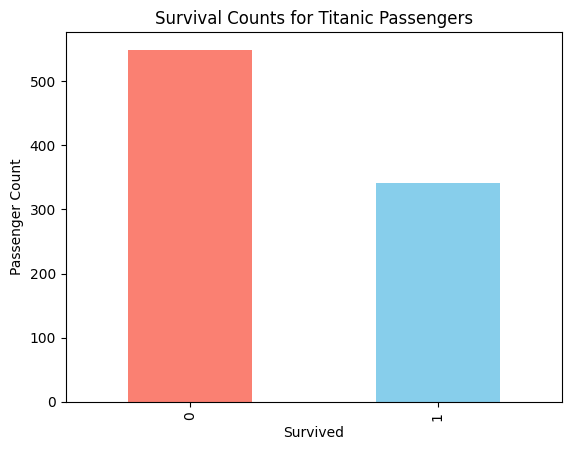

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of passengers in each survival category
plot_hist = titanic_cleaned.groupby('Survived')['PassengerId' ].count()

# Plotting the distribution of survival counts
ax = plot_hist.plot(kind='bar', color=['salmon', 'skyblue'])
ax.set_xlabel("Survived")
ax.set_ylabel("Passenger Count")
ax.set_title("Survival Counts for Titanic Passengers")

plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_cleaned['Age Group'] = pd.cut(titanic_cleaned['Age'], bins=age_bins, labels=age_labels)

C:\Users\Lachu\AppData\Local\Temp\ipykernel_15664\1901663836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_cleaned, palette="pastel")


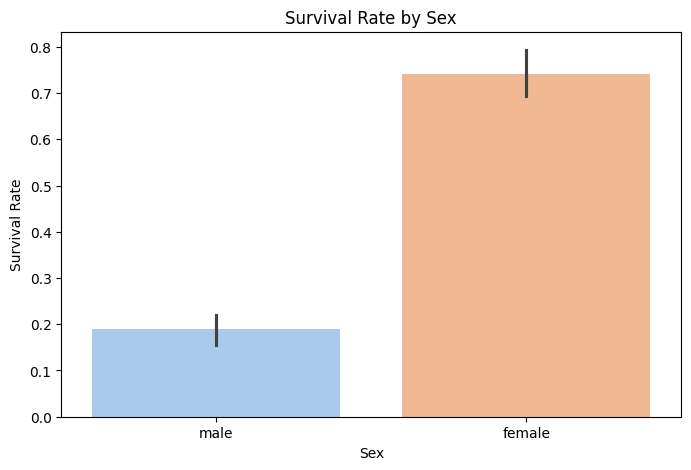

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_cleaned, palette="pastel")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.show()

C:\Users\Lachu\AppData\Local\Temp\ipykernel_15664\1089154242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_cleaned, palette="Blues_d")


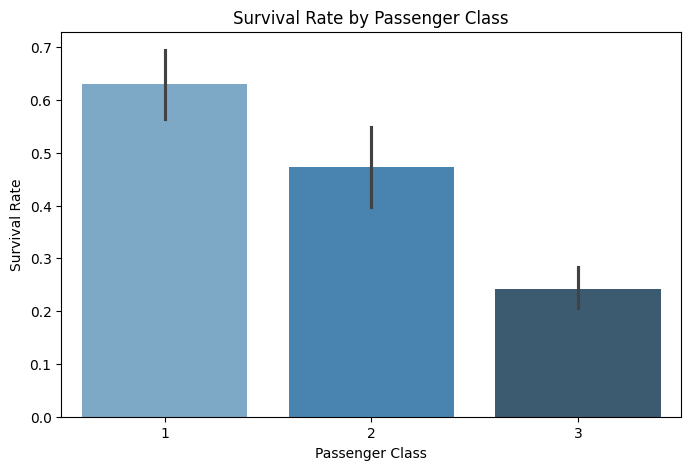

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_cleaned, palette="Blues_d")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

C:\Users\Lachu\AppData\Local\Temp\ipykernel_15664\4098393801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=titanic_cleaned, palette="Blues_d")


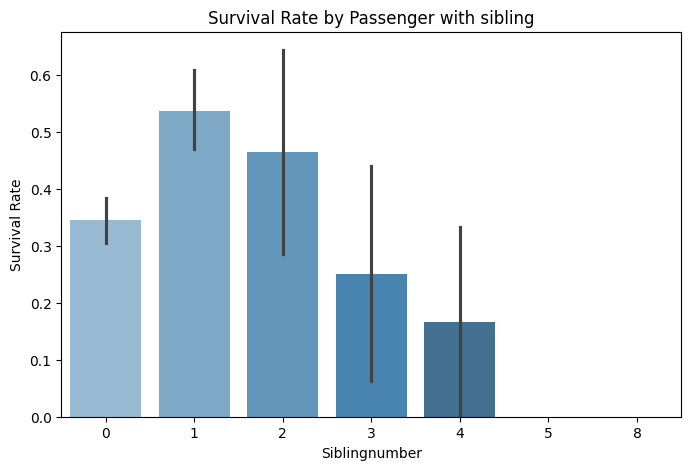

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=titanic_cleaned, palette="Blues_d")
plt.title("Survival Rate by Passenger with sibling")
plt.ylabel("Survival Rate")
plt.xlabel("Siblingnumber")
plt.show()


## Task 5: Feature Engineering
- Create a new column called 'Age Group' that divides passengers into age categories (e.g., 'Child', 'Adult', 'Senior').
- Use this new column to group passengers and calculate the survival rate for each age group.

### Hint:
Use Pandas' `pd.cut()` to create the 'Age Group' column and then `groupby()` to analyze survival rates.


In [15]:
# Create a new 'Age Group' column and analyze survival rates by age group
# (Code here)
import pandas as pd
# Adjust the labels to match the bins correctly
titanic['Age Group'] = pd.cut(x=titanic['Age'], bins=[0, 10, 20, 40, 60, 80, 100], labels=['0 to 10', '11 to 20', '21 to 40', '41 to 60', '61 to 80', '81 to 100'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21 to 40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21 to 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21 to 40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21 to 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21 to 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21 to 40
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,11 to 20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21 to 40


In [21]:
# Sum of survivors in each age group
titanic_survival_agegroup = titanic.groupby('Age Group')['Survived'].sum()
titanic_survival_agegroup

C:\Users\Lachu\AppData\Local\Temp\ipykernel_4580\3842402480.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_survival_agegroup = titanic.groupby('Age Group')['Survived'].sum()


Age Group
0 to 10       38
11 to 20      44
21 to 40     153
41 to 60      50
61 to 80       5
81 to 100      0
Name: Survived, dtype: int64